In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  # 可视化包
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Probabilities&Stats Bootcamp

# 1 Samples and random variables

**Example 1.1** Binary random variable: students passing (1) or failing (0) exam. 

Can take both values depending on which student we take. If we do not know the student's background and level of preparation, the outcome is totally random for us. Let's estiate the odds based on a track of observations

In [2]:
#consider a sample of observations
#generate pass-fail results; we'll talk about how we did that later
np.random.seed(2018)
E11=sample = stats.bernoulli.rvs(p = 0.7, size = 100)
E11

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0])

For a random student what is the chance she passes?

In [3]:
sum(E11) #68 student passed

68

In [4]:
len(E11) #out of 100

100

In [5]:
#The chances p are
print 'p={}'.format(1.0*sum(E11)/len(E11))

p=0.68


Our first discrete distribution - Bernoulli:
$$
P(S=1)=0.68
$$$$
P(S=0)=1-P(S=1)=0.32
$$

**Example 1.2** Discrete random variable: students getting "A,B,C,F"

In [6]:
np.random.seed(2018)
E12=np.random.choice(np.array(['A','B','C','F']),100,p=[0.15,0.55,0.2,0.1])
E12

array(['C', 'A', 'F', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'C', 'F', 'C',
       'A', 'B', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'F', 'B', 'B', 'B',
       'A', 'F', 'C', 'B', 'B', 'B', 'A', 'F', 'F', 'A', 'B', 'A', 'B',
       'B', 'B', 'B', 'A', 'B', 'C', 'C', 'F', 'B', 'F', 'B', 'C', 'B',
       'A', 'B', 'B', 'A', 'B', 'F', 'B', 'B', 'F', 'B', 'B', 'B', 'B',
       'B', 'C', 'B', 'B', 'A', 'A', 'B', 'C', 'B', 'F', 'B', 'A', 'C',
       'B', 'A', 'A', 'B', 'C', 'C', 'B', 'B', 'C', 'A', 'C', 'F', 'A',
       'B', 'B', 'B', 'A', 'B', 'C', 'C', 'B', 'C'], 
      dtype='|S1')

In [7]:
P={}
P['A']=1.0*sum(E12=='A')/len(E12); P['A']

0.18

In [8]:
P['B']=1.0*sum(E12=='B')/len(E12); P['B']

0.5

In [9]:
P['C']=1.0*sum(E12=='C')/len(E12); P['C']

0.19

In [10]:
P['F']=1.0*sum(E12=='F')/len(E12); P['F']

0.13

In [11]:
P

{'A': 0.18, 'B': 0.5, 'C': 0.19, 'F': 0.13}

In [12]:
print P['A']+P['B']+P['C']+P['F']

1.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


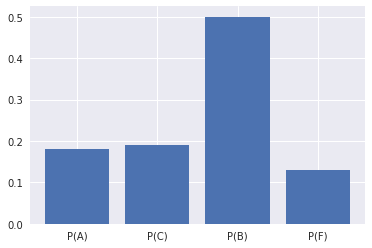

In [13]:
#distribution plot
plt.bar(range(len(P)),P.values(), align='center')
plt.xticks(range(len(P)), ['P('+p+')' for p in P.keys()]);

Knowing $P(A,B,C,F)$ (discrete random variable distribution) allows us to estimate the odds of a random observation for this random variable - taking a random student and asking her/his grade

**Example 1.3** Continous random variable: students credit from 0.0 to 100.0

In [14]:
np.random.seed(2018)
E13=np.random.normal(loc=60, scale=15, size=100)
E13

array([ 55.84848606,  68.72776503,  92.22598896,  40.80769494,
        67.53415334,  72.84043943,  57.85814887,  61.65117998,
        49.67902813,  66.50346122,  67.65331504,  57.52303539,
        39.72331432,  68.19946125,  78.45982682,  76.14669157,
        41.84062681,  55.39985146,  44.13871739,  66.03085382,
        64.33747682,  79.24099834,  44.01456299,  34.40050695,
        57.40803911,  60.95565259,  65.55942578,  35.93185591,
        27.51405939,  65.70555191,  55.85248366,  51.36477083,
        66.3278146 ,  70.57170445,  60.68101743,  67.96035107,
        62.07188043,  65.556947  ,  59.19183295,  76.09194   ,
        66.22878885,  48.12664479,  47.9493769 ,  60.06000119,
        72.57282607,  60.70625582,  26.68219672,  66.73185671,
        59.79849335,  71.80563714,  62.82501209,  36.29653689,
        53.79672488,  43.8545619 ,  47.22247168,  71.77131902,
        50.91341591,  57.77199608,  62.0063864 ,  46.07865013,
        59.35956358,  80.06874654,  59.65420687,  73.97

In [15]:
#no point of questioning the odds of a specific outcome as they are usually neglectably low given that the outcome could be any of infinitely many real numbers within a given interval 
sum(E13==80.0)

0

In [16]:
#however one can ask for the odds of getting a value higher/lower than something
sum(E13>80)

5

In [17]:
print 'P(S>80)={}'.format(1.0*sum(E13>80)/len(E13))

P(S>80)=0.05


In [18]:
#or being within a certain range
print 'P(S in [60,80])={}'.format(1.0*sum((E13>=60)&(E13<=80))/len(E13))

P(S in [60,80])=0.44


(array([  0.,   0.,   0.,   0.,   2.,   2.,   1.,   5.,   6.,  12.,   8.,
         15.,  13.,  18.,   8.,   5.,   3.,   1.,   1.,   0.]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.]),
 <a list of 20 Patch objects>)

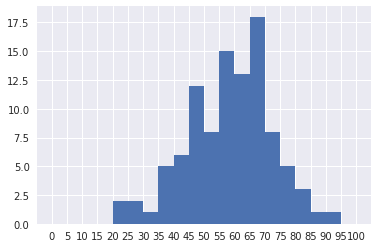

In [19]:
plt.xticks(range(0,101,5))
plt.hist(E13,bins=20,range=(0,100),align='mid')

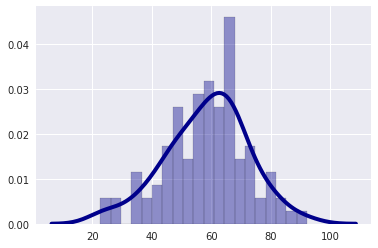

In [20]:
sns.distplot(E13, hist=True, kde=True, 
             bins=20,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# 2 Sample distributions

Observe a random variable $X$ through a sample of integer or real-valued observations $X_1,X_2,...,X_N$. Key distribution parameters are:
1) Sample average (mean):
$$
\mu=E[X]=\frac{\sum\limits_{j=1}^N X_j}{N},
$$
2) Sample variance $var[X]$ and standard deviation $\sigma$ (how far on average are observations from the mean or what average error to expect when approximating random variable with its mean):
$$
\sigma^2=var[X]=\frac{\sum\limits_{j=1}^N (X_j-\mu)^2}{N}.
$$

In [21]:
mu=E13.mean()
print 'Average credit mu={}'.format(mu)

Average credit mu=58.408967358


In [22]:
sigma=E13.std()
print 'Standard deviation of credits sigma={}'.format(sigma)

Standard deviation of credits sigma=13.7964046193


In [23]:
#manual computation
((E13-E13.mean())**2).mean()**0.5

13.796404619346905

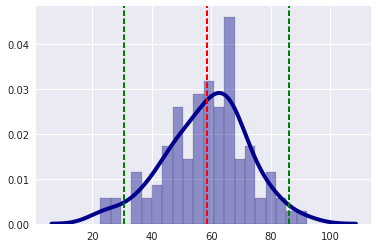

In [24]:
#visualize mu and mu+-sigma interval
sns.distplot(E13, hist=True, kde=True, 
             bins=20,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-2*sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+2*sigma, color='g', ls='--', lw=2.0)

** Example 2.1.** Real world example: real estate prices in Queens

In [25]:
#Consider a sample of individual house sale prices in one of the zip codes in Queens: 11412.
E21 = np.loadtxt('data/NYC_RE_11412_single.csv')
print(E21[0:10])
mu=mean(E21)
sigma=std(E21)
print('Mean={0}'.format(mu))
print('Standard deviation={0}'.format(sigma))

[ 260000.  389500.  275600.  280000.  243360.  390370.  329000.  410000.
  280000.  415000.]
Mean=326267.647327
Standard deviation=103186.979881


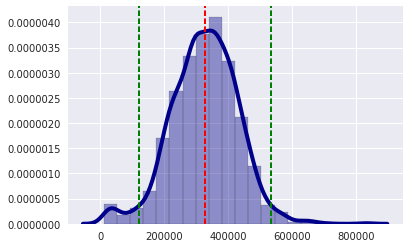

In [26]:
sns.distplot(E21, hist=True, kde=True, 
             bins=20,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-2*sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+2*sigma, color='g', ls='--', lw=2.0)

# 3. Discrete random variable distribution

When we know the sample of observations for a random variable we judge the odds based on it. Alternatively we may be given those odds but not the sample. 

E.g. without trying many times we know that flipping a coin gives 50%-50% odds for heads or tails. Or that rolling a dice gives $1/6$ probability for each outcome as all 6 outcomes those are equally probable.

While random event has two possible outcomes - happened or not, the discrete random variable generalize that admitting a certain finite set of possible outcomes, for example integer numbers (e.g. dots on a dice) or any cathegorical value (e.g. student grade).

The probability distribution of a random variable $X$ is defined by the odds $P(X=k)$ for each possible outcome $k$. Clearly
$$
\sum\limits_k P(X=k)=1
$$

## 3.1. Mean and variance

While knowing the exact distribution provides a comprehensive description of a variable, sometimes assessing its key characteristics is also important. The quantities below generalize the sample mean and variance assuming different probabilities between different outcomes (while considering the sample of observations we assume all of them equally probable). 

Mean:
$$\mu=E[X]=\sum_k P(X=k)k$$
Variance:
$$\sigma^2=var[X]=E[(X-E[X])^2]=\sum_k P(X=k)(k-\mu)^2$$
Standard deviation:
$$\sigma[X]=\sqrt{var[E]}=\sqrt{\sum_k P(X=k)(k-\mu)^2}$$
Coefficient of variation:
$$
c_v=\frac{\sigma}{\mu}
$$
Some useful properties:
$$
E[X^2]=\sum_k P(X=k)k^2=\sum_k P(X=k)(k-\mu)^2+2\mu\sum_k P(X=k)k-\mu^2\sum_k P(X=k)=$$
$$\sigma^2+2\mu^2-\mu^2=\mu^2+\sigma^2.$$

So
$$
var[X]=\sigma^2=E[X^2]-E[X]^2
$$

$$
E[X+Y]=E[X]+E[Y]
$$$$
E[a X]=aE[X], var[aX]=a^2 var[X]
$$

If two variables are independent (i.e. $P(Y=y|X=x)=P(Y=y)$ - see conditional probabilities below).
$$
E[XY]=E[X]E[Y]
$$$$
var[X+Y]=var[X]+var[Y]
$$$$
var[X-Y]=var[X]+var[-Y]=var[X]+var[Y]
$$

In [27]:
#mean, variance and standard deviation for rolling a dice
x=np.array(range(1,7))
p=np.array([1.0/6]*6)
mu=sum(p*x)
sigma2=sum(np.square(x-mu)*p)
print('Mean, mu={0}'.format(mu))
print('Variance={0}'.format(sigma2))
print('Standard deviation, sigma={0}'.format(sigma2**0.5))

Mean, mu=3.5
Variance=2.91666666667
Standard deviation, sigma=1.70782512766


Probability distribution for a sum of two rolled dices

[0 0 1 2 3 4 5 6 5 4 3 2 1]


<Container object of 13 artists>

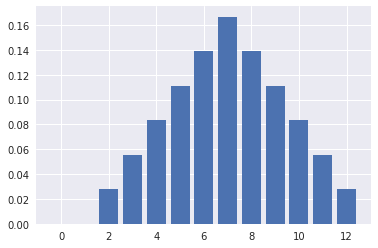

In [28]:
p=np.array([0]*13) #array for accumulating probabilities
for i in range(1,7): #loop through all the possible outcomes
    for j in range(1,7):
        p[i+j]+=1 #counting occurances for each sum
print(p)
p=p/1.0/sum(p) #normalize, transorming to probability distribution
s=np.array(range(0,13)) #possible outcomes
plt.bar(s,p, align='center') #plot their probabilities P(X=s)

In [29]:
#Mean, variance and standard deviation for the above
mu=sum(s*p)
sigma2=sum(np.square(s-mu)*p)
print('Mean, mu={0}'.format(mu))
print('Variance={0}'.format(sigma2))
print('Standard deviation, sigma={0}'.format(sigma2**0.5))

Mean, mu=7.0
Variance=5.83333333333
Standard deviation, sigma=2.4152294577


## 3.2. Bernoulli distribution
Flipping a coin or any other random event happening with a probability $p$:
$$
Bern(X=1|p)=p
$$$$
Bern(X=0|p)=1-p
$$$$
\mu=E[X]=1\cdot Bern(X=1|p)+0\cdot Bern(X=0|p)=p
$$$$
\sigma=\sqrt{(1-\mu)^2 Bern(X=1|p)+(0-\mu)^2 Bern(X=0|p)}=\sqrt{(1-p)^2+p^2(1-p)}=\sqrt{p(1-p)}.
$$

In [30]:
random.seed(2015)
sample = stats.bernoulli.rvs(p = 0.7, size = 50)
print(sample)
sum(sample)

[0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 0 1 1]


37

In [31]:
counts=[]
for i in range(0,10000):
    sample = stats.bernoulli.rvs(p = 0.7, size = 50)
    counts.append(sum(sample))
print(counts[0:100])

[38, 31, 31, 27, 34, 36, 36, 36, 31, 38, 33, 34, 34, 44, 35, 30, 39, 37, 36, 37, 30, 33, 32, 34, 37, 30, 38, 34, 29, 33, 33, 33, 38, 39, 34, 41, 36, 36, 34, 23, 38, 36, 39, 31, 38, 34, 39, 35, 37, 36, 41, 34, 30, 34, 36, 28, 42, 39, 35, 32, 40, 37, 32, 35, 32, 38, 35, 33, 35, 29, 40, 34, 38, 32, 40, 32, 36, 34, 42, 36, 39, 34, 36, 39, 37, 41, 33, 32, 30, 34, 33, 34, 36, 37, 37, 33, 36, 37, 38, 36]


Mean=34.9582
Standard deviation=3.21335537406


<Container object of 25 artists>

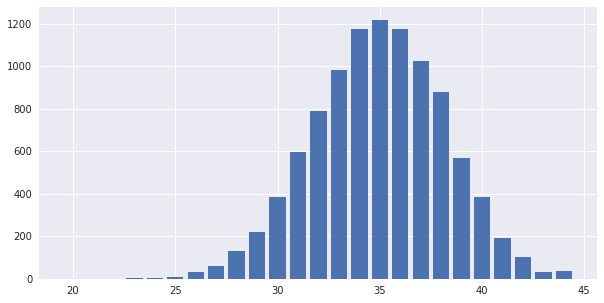

In [32]:
print('Mean={0}'.format(mean(counts)))
print('Standard deviation={0}'.format(std(counts)))
h=np.histogram(counts,range=(20,45),bins=25)
plt.figure(figsize = (10,5))
plt.bar(h[1][0:-1],h[0])

## 3.3. Binomial distribution
Number of successes of a series of random (Bernoulli) events
$$
Bin(X=k|n,p)=C^k_n p^k (1-p)^{n-k},
$$$$
C^k_n=\frac{n!}{(n-k)!k!}
$$$$
\mu=E[X]=pn
$$$$
\sigma[X]=\sqrt{np(1-p)}
$$

In [33]:
p=0.7
n=50
mu=p*n
sigma=sqrt(n*p*(1-p))
print('Mean={0}'.format(mu))
print('Standard deviation={0}'.format(sigma))
print(stats.binom.pmf(37, p=p, n=n))




Mean=35.0
Standard deviation=3.2403703492
0.105017451475


<Container object of 25 artists>

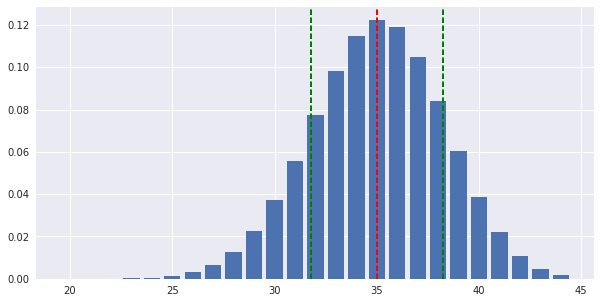

In [34]:
plt.figure(figsize = (10,5))
k=range(20,45)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.binom.pmf(k, p=0.7, n=50))

## 3.4. Poisson distribution
Number of events happening with a certain frequency $\lambda$ (like device failures, crime, disasters)  
泊松分布适合于描述单位时间内随机事件发生的次数的概率分布
$$
Poi(X=k|\lambda)=e^{-\lambda}\frac{\lambda^k}{k!}
$$$$
E[X]=var[X]=\lambda=\mu=\sigma^2
$$

Example: New house construction permits issued in Staten Island average at 700 per year. Assume construction permits are requested at a homogenous rate over time, i.e. their number follows Poisson distribution

Standard deviation range=(673,726), probability=0.692567740903


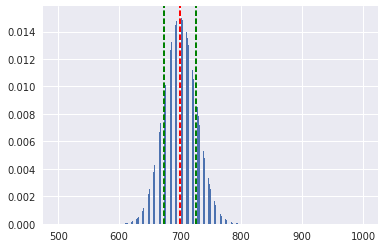

In [35]:
plt.figure()
k=range(500,1000,2)
mu=700
sigma=sqrt(mu)
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
plt.bar(k,stats.poisson.pmf(k, mu=mu))
p=sum(stats.poisson.pmf(range(int(mu-sigma),int(sigma+mu+1)), mu=mu))
print('Standard deviation range=({0},{1}), probability={2}'.format(int(mu-sigma),int(sigma+mu),p))

** Example 3.4.1 ** 25 named hurricanes hit Bermuda during 22 years from 1991 till 2012. Given this statistics, what is the probability of getting at least 3 hurricanes during the same year (it actually happened in 1998)?

0.107014227808


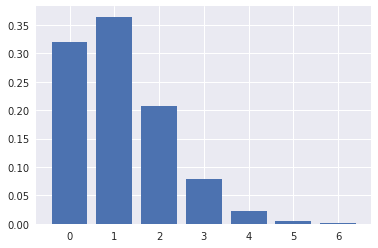

In [36]:
plt.figure()
k=range(0,7)
# 事件概率等于25个飓风/22年
mu=25.0/22
plt.bar(k,stats.poisson.pmf(k, mu=mu))
print(1-sum(stats.poisson.pmf(range(0,3), mu=mu)))

# 4. Continous random variable distributions

If $X$ is real-valued (e.g. student credits or house prices), there is no point of questioning $P(X=x)$ for a specific value $x$ - it is usually neglectably low as the number of possible values $x$ is infinite. Instead it is characterized by a non-decreasing $F(x)=P(X\leq x)$ valued between 0 and 1, called cumulative distribution function (CDF，累计分布函数，表示概率). Knowing it one can figure out
$$
P(a\leq X\leq b)=F(b)-F(a)
$$
If $F$ is differentiable then its derivative 
$$
p(x)=F'(x)=\lim\limits_{\Delta x\to 0}\frac{P(x\leq X\leq x+\Delta x)}{\Delta x}
$$ 
is called a probability density function (PDF，概率密度函数). Then
$$
P(a\leq X\leq b)=\int\limits_a^b p(x)dx
$$
so density "weights" each specific value of $x$, allowing to integrate them into finite nonzero probabilities for $X$ getting into each specific interval $[a,b]$. For small intervals this could be approximated as
$$
P(a\leq X\leq b)=p\left(\frac{a+b}{2}\right)(b-a).
$$

## 4.1. Mean and variance, quantiles

The key quantities of continous random varialbe distribution are defined similar to those of discrete ones, just that one uses integration instead of summation.

Mean:
$$
\mu=E[X]=\int\limits_x x p(x)dx=\int x d P
$$
Variance:
$$
\sigma^2=var[X]=E[(X-E[X])^2]=\int\limits_x (x-\mu)^2 p(x)dx
$$
Quantile:
$$
x_\alpha=F^{-1}(\alpha); P(X\leq x_\alpha)=\alpha
$$
$$
E[X+Y]=E[X]+E[Y]
$$$$
E[qX]=qE[X]; var[qX]=q^2 var[X].
$$
The following holds for independent variables X and Y only (i.e. $P(Y=y|X=x)=P(Y=y)$)
$$
var[X+Y]=var[X]+var[Y], \sigma[X+Y]=\sqrt{\sigma[X]^2+\sigma[Y]^2}.
$$$$
E[XY]=E[X]E[Y]
$$

## 4.2. Uniform distribution

Random variable uniformly distributed over a certain interval
$$
Unif(x|a,b)=\frac{1}{b-a} I(a\leq x\leq b)
$$
$$
\mu=E[X]=\frac{a+b}{2}
$$$$
\sigma[X]=\frac{(b-a)}{2\sqrt{3}}
$$

(0, 1.1)

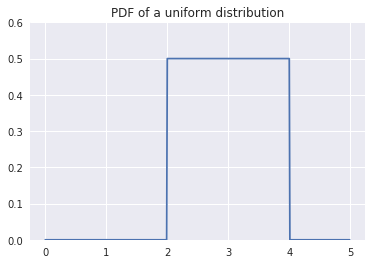

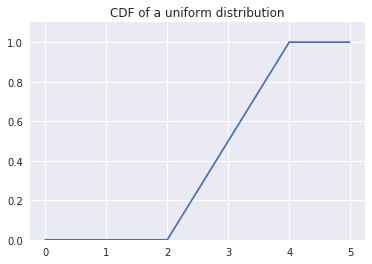

In [37]:
plt.figure()
x=np.array(range(0,500))*0.01
a=2
b=4
w=b-a
plt.title('PDF of a uniform distribution')
plt.plot(x,stats.uniform.pdf(x,a,w))
plt.ylim([0,0.6])
plt.figure()
plt.title('CDF of a uniform distribution')
plt.plot(x,stats.uniform.cdf(x,a,w))
plt.ylim([0,1.1])

## 4.3. Normal distribution

A very common continous distribution - happens to represent a number of real-world processes (physics, biology, sociology, economics etc): characteristics of people and animals, errors of astronomical observations, income etc.

### Central limit theorem: 
a sample average $\overline{X}=\frac{\sum\limits_i X_i}{N}$ of a random sample of N instances ${X_1,X_2,...,X_N}$ of a random variable $X$ ($E[X]=\mu$, $std[X]=\sigma$) has a distribution close to normal ${\cal N}(\overline{X}|\mu,\sigma^2/N)$ for large $N$. 

Rigorously
$$
\sqrt{N}(\overline{X}-\mu)\to {\cal N}(0,\sigma^2),
$$
while $N\to\infty$.

Probability density function:
$$
{\cal N}(X=x|\mu,\sigma^2)=\phi(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Cumulative distribution function
$$
\Phi(x|\mu,\sigma^2)=\int\limits_{-\infty}^x \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt
$$

Sum of independent normally distributed random variables is also normally distributed.

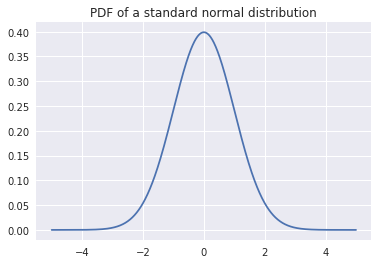

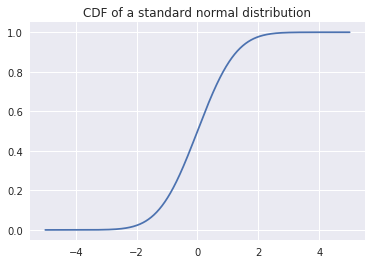

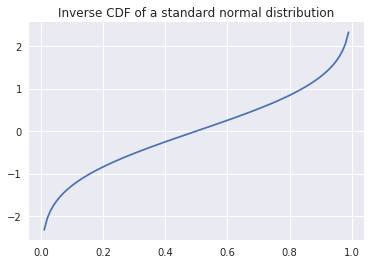

In [38]:
plt.figure()
x=np.array(range(-500,501))*0.01
plt.title('PDF of a standard normal distribution')
plt.plot(x,stats.norm.pdf(x,0,1))
plt.figure()
plt.title('CDF of a standard normal distribution')
plt.plot(x,stats.norm.cdf(x,0,1))
plt.figure()
plt.title('Inverse CDF of a standard normal distribution') #for each P shows the value x such that there is a chance P that X<=x
x=np.array(range(0,101))*0.01
plt.plot(x,stats.norm.ppf(x,0,1))

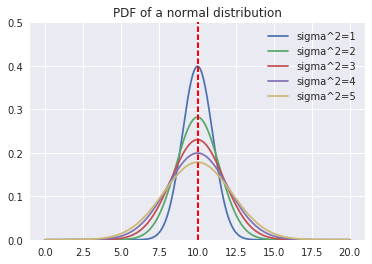

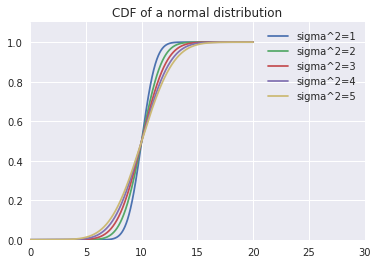

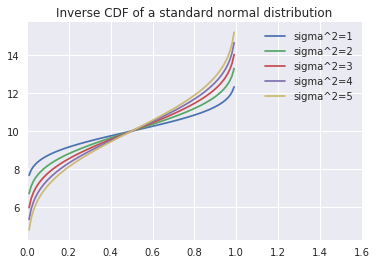

In [39]:
plt.figure()
x=np.array(range(0,2000))*0.01
mu=10
plt.title('PDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.pdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()
plt.axvline(mu, color='r', ls='--', lw=2.0)
plt.ylim([0,0.5])
plt.figure()
plt.title('CDF of a normal distribution')
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.cdf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.ylim([0,1.1])
plt.xlim([0,30])
plt.legend()
plt.figure()
plt.title('Inverse CDF of a standard normal distribution')
x=np.array(range(0,101))*0.01
plt.xlim([0,1.6])
for sigma2 in range(1,6):
    plt.plot(x,stats.norm.ppf(x,mu,sqrt(sigma2)),label='sigma^2={0}'.format(sigma2))
plt.legend()

But in spite of visual variaty of forms, actually all the normally distributed variables $X\sim {\cal N}(\mu,\sigma)$ could be easily derived from a single standard normal distritution $X_0\sim {\cal N}(0,1)$ as following: $X=X_0\sigma+\mu$.

So knowing properties of ${\cal N}(0,1)$ we can easily judge about all ${\cal N}(\mu,\sigma)$. For example good to remember the scale of quantiles:

In [42]:
#values of inverse cumulative distribution function (quantiles) at 95%, 99% etc play important role in statistics
# 分位函数
print(stats.norm.ppf(0.95,0,1))
print(stats.norm.ppf(0.99,0,1))
print(stats.norm.ppf(0.999,0,1))
#because all normal distributions are rescaled standard normal, those values serve as universal proportions

1.64485362695
2.32634787404
3.09023230617


** Example 4.3.1 ** So if for example daily energy usage of the building is known to be normally distributed with a mean of $\mu=10Mwh$ and standard deviation $\sigma=3MWh$, and we want to plan an energy supply system which will have enough capacity to satisfy hourly demand in $99.9\%$ of cases, then it's maximal capacity should be planned as approx $10+3(std)*3(99.9\% quantile)=19Mwh$.

In [43]:
#precisely
print(stats.norm.ppf(0.999,10,3))

19.2706969185


** Example 4.3.2 **
Recall the distribution of house prices. Fit normal distribution to it

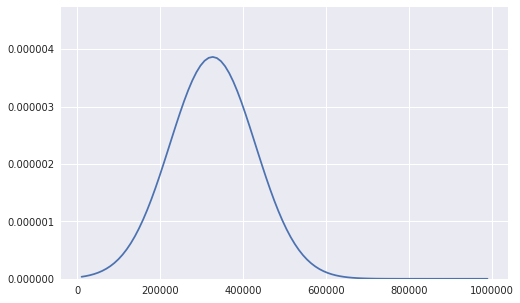

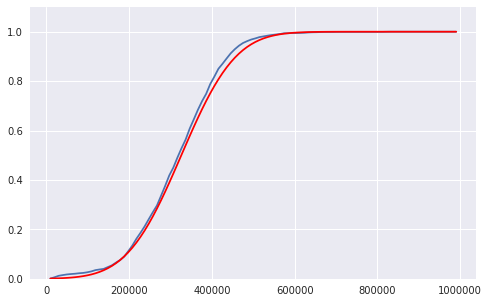

In [44]:
#get parameters of the distribution
prices=E21
mu=prices.mean()
sigma=prices.std()
#plot histogram
h=np.histogram(prices,range=(1e4,1e6),bins=100)
plt.figure(figsize = (8,5))
plt.bar(h[1][0:-1],h[0]/9900.0/sum(h[0]))
x=h[1][0:-1]

#plot normal distribution with the same parameters
plt.plot(x,stats.norm.pdf(x,mu,sigma))
cumdistr = np.cumsum(h[0], axis=0)
#compare sample CDF (% of houses priced below X) and normal CDF
plt.figure(figsize = (8,5))
plt.ylim(0,1.1)
plt.plot(x,cumdistr*1.0/cumdistr[-1])
plt.plot(x,stats.norm.cdf(x,mu,sigma),'r')

In many real-world cases not the quantity considered but rather its logarithm happens to be distributed normally (e.g. activity of customers, population of cities etc)
### lognormal distribution: 
$log(X)\sim {\cal N}(\mu,\sigma^2)$

(0, 1.1)

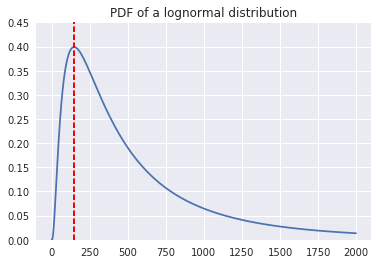

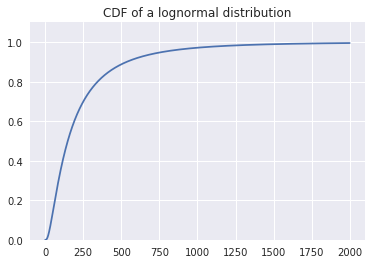

In [45]:
plt.figure()
x=np.array(range(1,2000))*1.0
mu=5
sigma=1
plt.title('PDF of a lognormal distribution')
plt.plot(x,stats.norm.pdf(log(x),mu,sigma))
plt.axvline(exp(mu), color='r', ls='--', lw=2.0)
plt.ylim([0,0.45])
plt.figure()
plt.title('CDF of a lognormal distribution')
plt.plot(x,stats.norm.cdf(log(x),mu,sigma))
plt.ylim([0,1.1])

## 4.4. Other useful distributions

### Logistic distribution

Probability Density Function
$Logist(X=x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

Cumulative Density Function
$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

$$
\mu=E[X]=0, \sigma[X]=\pi/\sqrt{3}.
$$

### Exponential distribution

Probability Density Function
$$
Exp(X=x|\lambda)=\left\{\begin{array}{ll}\lambda e^{-\lambda x}, & x\geq 0\\0,& x<0 \end{array}\right.
$$

Cumulative Density Function
$$
F(x)=\left\{\begin{array}{ll}1-e^{-\lambda x}, & x\geq 0\\0, & x<0\end{array}\right.
$$

$$
\mu=E[X]=\sigma[X]=1/\lambda
$$

### Laplace distibution

Another related distribution is:

$$
Laplace(X=x|\mu,\sigma)=\frac{1}{\sqrt{2}\sigma}e^{-\frac{\sqrt{2}|x-\mu|}{\sigma}}
$$

If $X\sim Laplace$ then $|X-E[X]|\sim Exp$. Also difference between two identically distributed exponential random variables follows a Laplace distribution. 

### Pareto distribution

$$
Pareto(X=x|x_m,\alpha)=\left\{\begin{array}{ll}\frac{\alpha x_m^\alpha}{x^{\alpha+1}}, & x\geq x_m,\\
0, & x<x_m.\end{array}\right.
$$

Continous version of often observed discrete power-law distributions, like Zipf law.

### Gamma and Beta distributions:
$$
Gamma (X=x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}}{\Gamma(\alpha)}
$$$$
Beta(X=x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
$$

# 5. Correlation

Covarience:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]
$$
Pearson’s correlation coefficient:
$$
corr(X,Y)=\frac{cov(X,Y)}{\sigma[X] \sigma[Y]} 
$$

Now again consider a real estate prices example, this for multi-apartments houses in Bronx's zip code 10466, and see how they are correlated with the building square footage.

** Example 5.1. ** House prices in Bronx vs size

In [46]:
#read data in pandas
E51=pd.read_csv('data/NYC_RE_10466_multi.csv'); E51.head()

,Size,Price
0,7745,700000.0
1,3700,335000.0
2,5250,510000.0
3,4082,285000.0
4,4082,198558.0


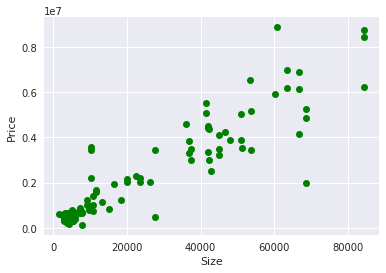

In [47]:
#scatter plot of Price vs Size - we see they are related
plt.figure()
plt.plot(E51.Size,E51.Price,'og')
plt.xlabel('Size')
plt.ylabel('Price')

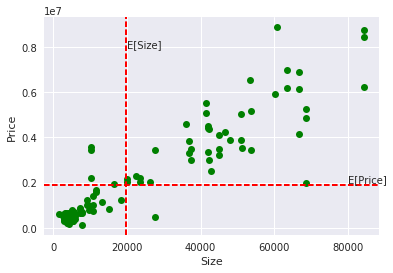

In [48]:
#show the averages E[Price], E[Size]
plt.figure()
plt.plot(E51.Size,E51.Price,'og')
plt.xlabel('Size')
plt.ylabel('Price')
plt.axvline(E51.Size.mean(), color='r', ls='--', lw=2.0)
plt.text(2e4,8e6,'E[Size]',rotation=0)
plt.axhline(E51.Price.mean(), color='r', ls='--', lw=2.0)
plt.text(8e4,2e6,'E[Price]',rotation=0)

Recall Covarience:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]
$$
And Pearson’s correlation coefficient (normalized covariance):
$$
corr(X,Y)=\frac{cov(X,Y)}{\sigma[X] \sigma[Y]} 
$$
Every time both X and Y are above or below averages together, covariance is positive impacted\ 
Otherwise its negatively impacted

In [49]:
E51.corr()

,Size,Price
Size,1.000000,0.926478
Price,0.926478,1.000000


In [50]:
np.corrcoef(E51.Size,E51.Price)

array([[ 1.        ,  0.92647799],
       [ 0.92647799,  1.        ]])

In [51]:
from scipy.stats.stats import pearsonr
pearsonr(E51.Size,E51.Price)[0]

0.92647798713990281

One can see that 
$$
-1\leq corr(X,Y)\leq 1
$$ 
and $\pm 1$ are acheivable if and only if dependence between $X,Y$ is linear. 

Negative correlation means $Y$ decreases while $X$ increases.

Correlation above $60\%$ or below $-60\%$ is usually considered strong.

Between $\pm 40\%$ and $\pm 60\%$ is usually considered moderate.

Between $\pm 20\%$ and $\pm 40\%$ is usually considered weak.

Correlations around $0\%$ are fairly random.

# 6. Conditional probabilities and Bayes theorem

Conditional probability: $P(Y|X)$ - Y happens is X happened.

E.g. the total passing ratio on exam is 80%:
$$
P(pass)=80\%.
$$

However among the students who prepared the oddes of passing exam are 90%:
$$
P(pass|prepared)=90\%,
$$
while among those who did not only 60%:
$$
P(pass|not prepared)=60\%.
$$

What it does - it simply narrows down a set of possibilities

** Example 6.1. ** Take a number of 1 to 10; Y - number is full square (1, 4 or 9). $P(Y)=3/10=0.3$. $X$ - number is even (2,4,6,8,10). $P(Y|X)=1/5=0.2$.

Events $X$ and $Y$ are independent if and only if $P(Y|X)=P(Y)$.

Some useful rules below.

Multiplication rule
$$
P(X \cap Y)=P(Y|X)P(X).
$$
In case of independent events
$$
P(X \cap Y)=P(X)P(Y)
$$
However then
$$
P(Y|X)P(X)=P(X \cap Y)=P(X|Y)P(Y)
$$
meaning that
$$
P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}
$$
This is known as ** Bayes theorem **.

Summation rule
$$
P(Y)=P(Y\cap X)+P(Y\cap \overline{X})=P(Y|X)P(X)+P(Y|\overline{X})P(\overline{X})
$$

** Example 6.2. ** Recall students passing/failing exam. The overall percentage of passes is 80%. Say we ran an anonimous survey and know that among those who prepared, 90% passed, among those who did not - only 60%.

A) How many student prepared?

B) If we meet a random student who failed an exam what are the odds he/she did not prepare?

A) What we know is
$$
P(pass)=80\%.
$$
$$
P(pass|prepared)=90\%,
$$
$$
P(pass|not\ prepared)=60\%.
$$
What we need to find is $P(prepared)$. This can be done using summation rule
$$
0.8=P(pass)=P(pass|prepared)P(prepared)+P(pass|not\ prepared)P(not\ prepared)=
$$$$
=0.9 P(prepared)+0.6(1-P(prepared))=0.3 P(prepared) + 0.6,
$$
i.e.
$$
P(prepared)=(0.8-0.6)/0.3=2/3.
$$

B) We know all as above, what we need to find is $P(not prepared|fail)$.
$$
P(not\ prepared|fail)=\frac{P(fail|not\ prepared)P(not\ prepared)}{P(fail)}=
$$$$
=\frac{1-P(pass|not\ prepared))(1-P(prepared)}{1-P(pass)}=\frac{(1-0.6)(1-2/3)}{1-0.8}=0.4\cdot (1/3)/0.2=2/3.
$$

** Example 6.3.** Bayes theorem and linear regression

One can write a linear regression 
$$
y=wx+\varepsilon,
$$
where
$$
\varepsilon\sim {\cal N}(0,\sigma^2)
$$
as a probabilistic model
$$
y\sim {\cal N}(wx,\sigma^2).
$$
This gives a propability $P(y|w,x)$ of observing certain value of $y$ given input $x$ and parameter $w$.

*How do we find $w$?*

Let's flip the probabilities like in Bayes theorem
$$
P(w|y,x)\sim \frac{P(y|w,x)P(w)}{P(y)}
$$
As the overall chance $P(y)$ of observing the output $y$ regarless of the model does not depend on $w$ and given certain inital (prior) beliefs about $w$ (e.g. uninformed prior $P(w)\sim {\cal N}(0,V)$ for large enough $V$) one can get the posterior distribution
$$
P(w|y,x)\sim \phi(y|wx,\sigma^2)\phi(w|0,V).
$$
This given us not only a certain most probable value of $w$ maximizing the right-hand size, but also an entire probability distribution for it, capable of answering any probabilistic question about $w$, such as what is the chance that it belongs to a certain interval or what is the interval to which say 95% of most probably values of $w$ belong.

This approach is called Bayesian inference and it provides perhaps the most intuitive approach to confidence intervals, hypothesis testing (p-values) and regularization for the linear regression.